<a href="https://colab.research.google.com/github/Rimsha10/Price_Predictor/blob/m/carpricepredictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install fast_ml

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 kB 1.3 MB/s eta 0:00:00


In [ ]:
pip install --upgrade scikit-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 63.2 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


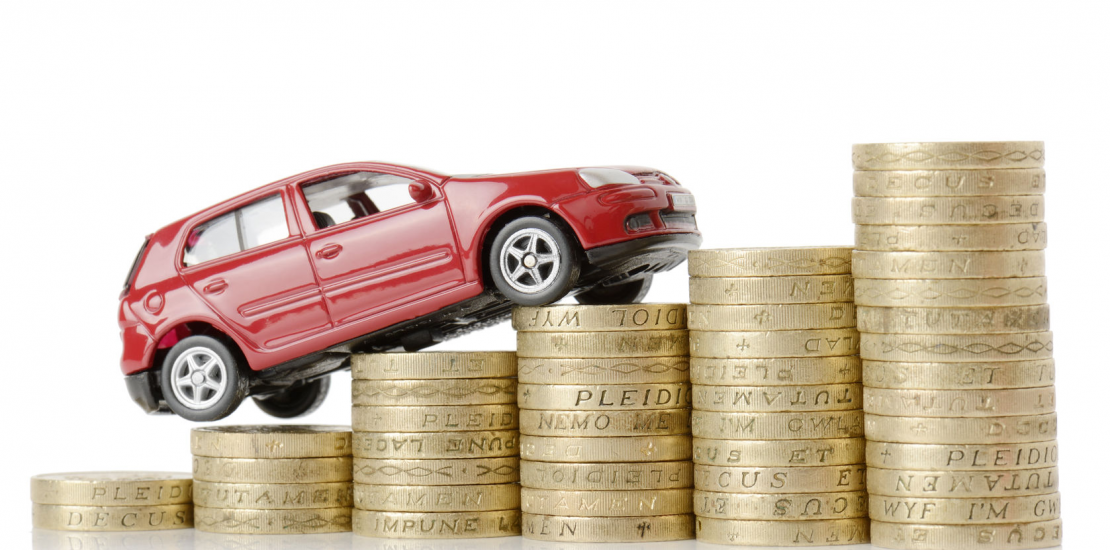

## Imports

In [ ]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns
import seaborn.objects as so
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso,Ridge
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.metrics import r2_score,roc_auc_score,mean_squared_error
import matplotlib.pyplot as plt
from fast_ml.model_development import train_valid_test_split
import pickle
import numpy as np

## Dataset

In [ ]:
data=pd.read_csv("/content/drive/MyDrive/growintern_internship/CarPrice_Assignment.csv")
data

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


### Description

In [ ]:
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [ ]:
data.describe(include="object")

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Preprocessing

Dropping irrelevant varibles

In [ ]:
data.drop('CarName',axis=1,inplace=True)
data.drop('car_ID',axis=1,inplace=True)

Correlation

<ipython-input-6-80cffa6ebb3a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


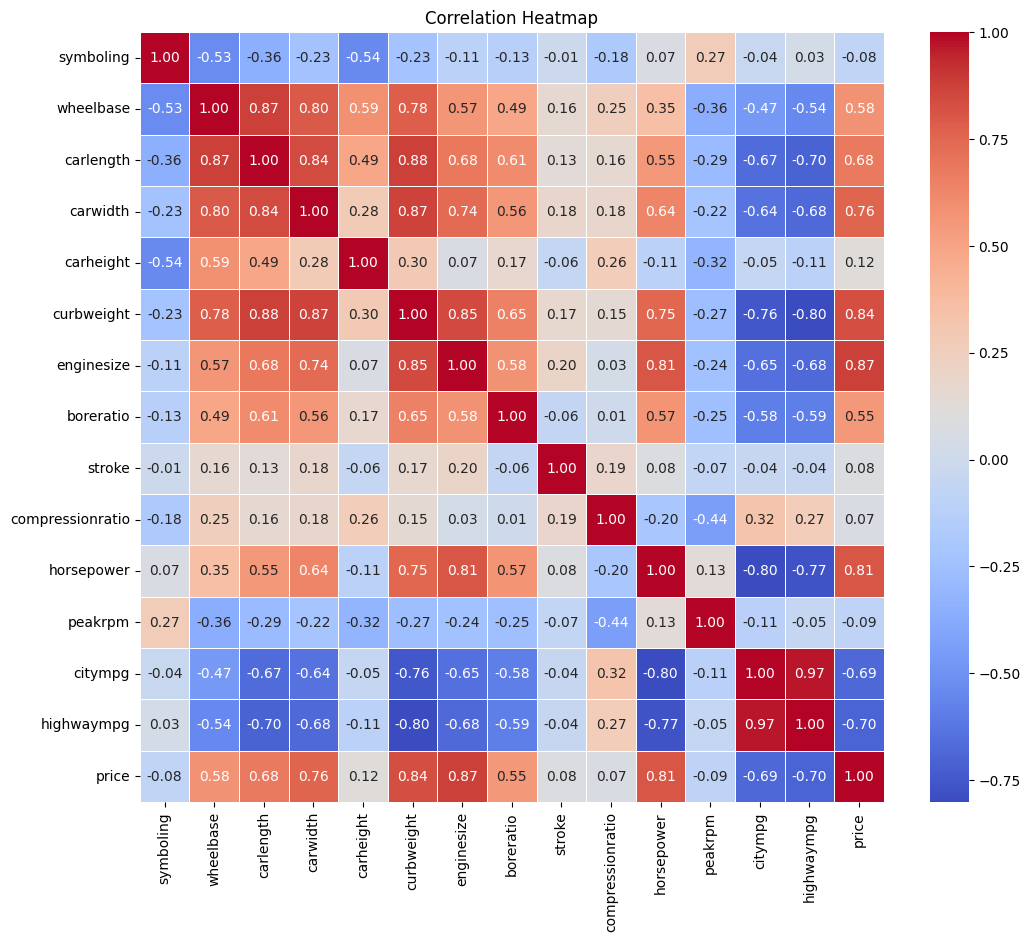

In [ ]:
def corre(data):
  correlation_matrix = data.corr()
  plt.figure(figsize=(12, 10))  # Adjust the figure size as needed
  sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
  plt.title('Correlation Heatmap')
  plt.show()
corre(data)

In [ ]:
features=data

Dropping Highly correlated features

In [ ]:
#features.drop('Cylinders',axis=1,inplace=True)
features.drop('price',axis=1,inplace=True)
features.drop('wheelbase',axis=1,inplace=True)
features.drop('carlength',axis=1,inplace=True)
features.drop('carwidth',axis=1,inplace=True)
features.drop('curbweight',axis=1,inplace=True)
features.drop('highwaympg',axis=1,inplace=True)


<ipython-input-6-80cffa6ebb3a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


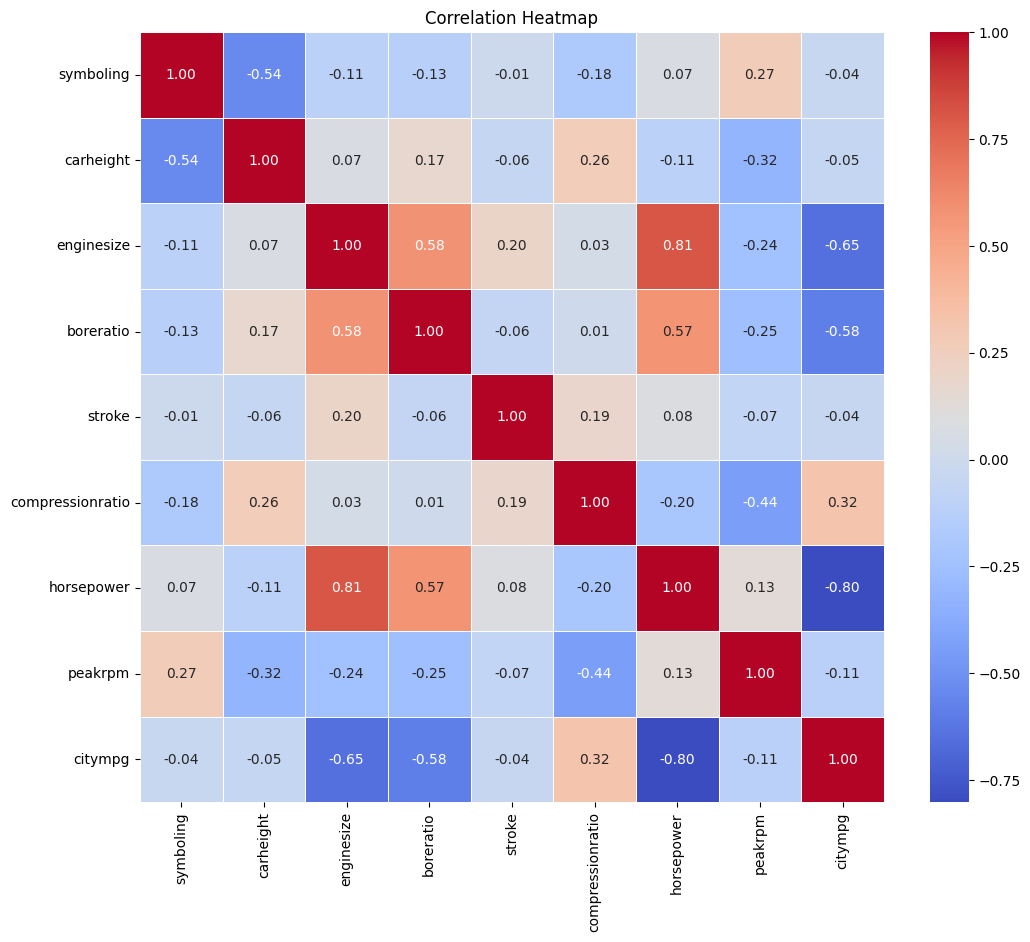

In [ ]:
corre(features)

In [ ]:
features.drop('horsepower',axis=1,inplace=True)


### Encoding

In [ ]:
data['fueltype']=data ['fueltype'].replace('gas',1)
data['fueltype']=data['fueltype'].replace('diesel',0)
data['doornumber']=data['doornumber'].replace('two',2)
data['doornumber']=data['doornumber'].replace('four',4)
data['enginelocation']=data['enginelocation'].replace('front',1)
data['enginelocation']=data['enginelocation'].replace('rear',0)

In [ ]:
data['cylindernumber']=data['cylindernumber'].replace('two',2)
data['cylindernumber']=data['cylindernumber'].replace('three',3)
data['cylindernumber']=data['cylindernumber'].replace('four',4)
data['cylindernumber']=data['cylindernumber'].replace('five',5)
data['cylindernumber']=data['cylindernumber'].replace('six',6)
data['cylindernumber']=data['cylindernumber'].replace('eight',8)
data['cylindernumber']=data['cylindernumber'].replace('twelve',12)

In [ ]:
data

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,carheight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,peakrpm,citympg
0,3,1,std,2,convertible,rwd,1,48.8,dohc,4,130,mpfi,3.47,2.68,9.0,5000,21
1,3,1,std,2,convertible,rwd,1,48.8,dohc,4,130,mpfi,3.47,2.68,9.0,5000,21
2,1,1,std,2,hatchback,rwd,1,52.4,ohcv,6,152,mpfi,2.68,3.47,9.0,5000,19
3,2,1,std,4,sedan,fwd,1,54.3,ohc,4,109,mpfi,3.19,3.40,10.0,5500,24
4,2,1,std,4,sedan,4wd,1,54.3,ohc,5,136,mpfi,3.19,3.40,8.0,5500,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,std,4,sedan,rwd,1,55.5,ohc,4,141,mpfi,3.78,3.15,9.5,5400,23
201,-1,1,turbo,4,sedan,rwd,1,55.5,ohc,4,141,mpfi,3.78,3.15,8.7,5300,19
202,-1,1,std,4,sedan,rwd,1,55.5,ohcv,6,173,mpfi,3.58,2.87,8.8,5500,18
203,-1,0,turbo,4,sedan,rwd,1,55.5,ohc,6,145,idi,3.01,3.40,23.0,4800,26


one-hot ending

In [ ]:
data1=pd.get_dummies(data, columns=['drivewheel','fuelsystem','carbody','drivewheel','aspiration','enginetype'])
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 40 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   symboling            205 non-null    int64  
 1   fueltype             205 non-null    int64  
 2   doornumber           205 non-null    int64  
 3   enginelocation       205 non-null    int64  
 4   carheight            205 non-null    float64
 5   cylindernumber       205 non-null    int64  
 6   enginesize           205 non-null    int64  
 7   boreratio            205 non-null    float64
 8   stroke               205 non-null    float64
 9   compressionratio     205 non-null    float64
 10  peakrpm              205 non-null    int64  
 11  citympg              205 non-null    int64  
 12  drivewheel_4wd       205 non-null    uint8  
 13  drivewheel_fwd       205 non-null    uint8  
 14  drivewheel_rwd       205 non-null    uint8  
 15  fuelsystem_1bbl      205 non-null    uin

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load your dataset into a DataFrame. Replace 'your_dataset.csv' with your actual dataset file.
def vif(features):
  # Select the 18 features for which you want to calculate VIF.
  selected_features = features
  # Calculate VIF for each feature.
  vif_data = pd.DataFrame()
  vif_data["Feature"] = selected_features.columns
  vif_data["VIF"] = [variance_inflation_factor(selected_features.values, i) for i in range(selected_features.shape[1])]

  # Display the VIF values.
  print(vif_data)


In [ ]:
vif(data1)

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


                Feature         VIF
0             symboling    2.770168
1              fueltype         inf
2            doornumber    3.306920
3        enginelocation    2.364524
4             carheight    2.914972
5        cylindernumber   17.649538
6            enginesize   24.589196
7             boreratio    6.743067
8                stroke    2.990620
9      compressionratio  116.243898
10              peakrpm    2.863828
11              citympg    6.307013
12       drivewheel_4wd         inf
13       drivewheel_fwd         inf
14       drivewheel_rwd         inf
15      fuelsystem_1bbl         inf
16      fuelsystem_2bbl         inf
17      fuelsystem_4bbl         inf
18       fuelsystem_idi         inf
19       fuelsystem_mfi         inf
20      fuelsystem_mpfi         inf
21      fuelsystem_spdi         inf
22      fuelsystem_spfi         inf
23  carbody_convertible         inf
24      carbody_hardtop         inf
25    carbody_hatchback         inf
26        carbody_sedan     

In [ ]:
features=data1.drop('price',axis=1)

In [ ]:
# Save the DataFrame to a CSV file
df_data.to_csv('/content/drive/MyDrive/growintern_internship/processeddata.csv', index=False)

In [ ]:
data1=pd.read_csv("/content/drive/MyDrive/growintern_internship/processeddata.csv")
data1

,symboling,fueltype,doornumber,enginelocation,carheight,cylindernumber,enginesize,boreratio,stroke,compressionratio,...,aspiration_std,aspiration_turbo,enginetype_dohc,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,price
0,3,1,2,1,48.8,4,130,3.47,2.68,9.0,...,1,0,1,0,0,0,0,0,0,13495.0
1,3,1,2,1,48.8,4,130,3.47,2.68,9.0,...,1,0,1,0,0,0,0,0,0,16500.0
2,1,1,2,1,52.4,6,152,2.68,3.47,9.0,...,1,0,0,0,0,0,0,1,0,16500.0
3,2,1,4,1,54.3,4,109,3.19,3.40,10.0,...,1,0,0,0,0,1,0,0,0,13950.0
4,2,1,4,1,54.3,5,136,3.19,3.40,8.0,...,1,0,0,0,0,1,0,0,0,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,1,4,1,55.5,4,141,3.78,3.15,9.5,...,1,0,0,0,0,1,0,0,0,16845.0
201,-1,1,4,1,55.5,4,141,3.78,3.15,8.7,...,0,1,0,0,0,1,0,0,0,19045.0
202,-1,1,4,1,55.5,6,173,3.58,2.87,8.8,...,1,0,0,0,0,0,0,1,0,21485.0
203,-1,0,4,1,55.5,6,145,3.01,3.40,23.0,...,0,1,0,0,0,1,0,0,0,22470.0


In [ ]:
data1.columns

Index(['symboling', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'carheight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'peakrpm', 'citympg'],
      dtype='object')

In [ ]:
target=data1['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data1, target, test_size=0.3, random_state=42)

In [ ]:
#df_data=data1.join(target)

## Train-test-valid split

In [ ]:
X_train, y_train, X_valid, y_valid, X_test, y_test = train_valid_test_split(data1, target = 'price', train_size=0.7, valid_size=0.15, test_size=0.15)

## Scaling

Normalization

In [ ]:
scaler = StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
X_valid_scaled=scaler.transform(X_valid)

## Hyperparameter Tuning

In [37]:
def tune_and_evaluate(model, param_grid, X_train, y_train, X_test, y_test):
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    bestscores=grid_search.best_score_
    best_model.fit(X_train, y_train)
    predictions = best_model.predict(X_test)

    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    print("Best hyperparameters",best_params)
    print("Best scores",bestscores)

    return mse, r2,best_params

In [38]:
# Random Forest Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}
rf_mse, rf_r2 ,besthyp_rf= tune_and_evaluate(RandomForestRegressor(random_state=42, n_jobs=-1), rf_param_grid, X_valid_scaled, y_valid, X_test_scaled, y_test)

# K-Nearest Neighbors Hyperparameter Tuning
knn_param_grid = {
    'n_neighbors':np.arange(3,15,1),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan'],
}
knn_mse, knn_r2,besthyp_knn = tune_and_evaluate(KNeighborsRegressor(n_jobs=-1), knn_param_grid, X_valid_scaled, y_valid, X_test_scaled, y_test)


Best hyperparameters {'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best scores 0.7931566966950135
Best hyperparameters {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'distance'}
Best scores 0.6476918726169053


In [39]:
# Create a Ridge regression model
# Define a grid of hyperparameters to search
param_grid_ridge = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}
# Create a Lasso regression model
ridge_mse, ridge_r2,besthyp_ridge= tune_and_evaluate(Ridge(), param_grid_ridge, X_valid_scaled, y_valid, X_test_scaled, y_test)

# Define a grid of hyperparameters to search
param_grid_lasso = {
    'alpha': [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
}
lasso_mse, lasso_r2,besthyp_lasso = tune_and_evaluate(Lasso(), param_grid_lasso, X_valid_scaled, y_valid, X_test_scaled, y_test)


Best hyperparameters {'alpha': 10.0}
Best scores 0.8059926990564058
Best hyperparameters {'alpha': 100.0}
Best scores 0.8744620105712398


In [40]:
param_grid_regre={'hidden_layer_sizes': [(100,), (50, 50), (100, 50, 25)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    'max_iter': [100, 200, 300],
}
regre_mse, regre_r2,besthyp_regre = tune_and_evaluate(MLPRegressor(), param_grid_regre, X_valid_scaled, y_valid, X_test_scaled, y_test)

Best hyperparameters {'activation': 'relu', 'alpha': 0.001, 'hidden_layer_sizes': (100, 50, 25), 'learning_rate': 'constant', 'max_iter': 100, 'solver': 'lbfgs'}
Best scores 0.640998210087872


In [ ]:
def evaluate_metrics(regr_name,y_pred,model):
  print(regr_name,"Evaluation Metric")
  print("MSE:", rf_mse)
  print("R-squared:", r2_score(y_test,y_pred))
  print('Train score: {}\nTest score: {}\nValid score: {}'.format(model.score(X_test_scaled,y_test),model.score(X_train_scaled,y_train),model.score(X_valid_scaled,y_valid)))

## RandomForestRegressor Model

In [ ]:
rf=RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split= 2, n_estimators= 200)
rf.fit(X_train_scaled,y_train)
rf_pred=rf.predict(X_test_scaled)
evaluate_metrics('RandomForestRegressor',rf_pred,rf)

RandomForestRegressor Evaluation Metric
MSE: 16035763.62887942
R-squared: 0.9073005599332431
Train score: 0.9073005599332431
Test score: 0.9677180080526745
Valid score: 0.9667715445478773


## KNeighborsRegressor Model

In [ ]:
knn=KNeighborsRegressor(metric='manhattan', n_neighbors=3, weights= 'distance')
knn.fit(X_train_scaled,y_train)
knn_pred=knn.predict(X_test_scaled)
evaluate_metrics('KNeighborsRegressor',knn_pred,knn)

KNeighborsRegressor Evaluation Metric
MSE: 16035763.62887942
R-squared: 0.7344304265112401
Train score: 0.7344304265112401
Test score: 0.9958928260369909
Valid score: 0.8901797726305497


## LinearRegression Regression

In [ ]:
lg=LinearRegression()
lg.fit(X_train_scaled,y_train)
lg_pred=lg.predict(X_test_scaled)
evaluate_metrics('LinearRegression',lg_pred,lg)


LinearRegression Evaluation Metric
MSE: 16035763.62887942
R-squared: 0.8960441479665696
Train score: 0.8960441479665696
Test score: 0.9128830674418302
Valid score: 0.7372619431103528


## Lasso Model

In [ ]:
lasso = Lasso(alpha=100.0)
lasso.fit(X_train_scaled,y_train)
lasso_pred=lasso.predict(X_test_scaled)
evaluate_metrics('Lasso',lasso_pred,lasso)

Lasso Evaluation Metric
MSE: 16035763.62887942
R-squared: 0.9180162654102824
Train score: 0.9180162654102824
Test score: 0.9033623168225414
Valid score: 0.822011132546836


## Ridge Regressor Model

In [ ]:
ridge = Ridge(alpha=10.0)
ridge.fit(X_train_scaled,y_train)
ridge_pred=ridge.predict(X_test_scaled)
evaluate_metrics('Ridge',ridge_pred,ridge)

Ridge Evaluation Metric
MSE: 16035763.62887942
R-squared: 0.9146181901725615
Train score: 0.9146181901725615
Test score: 0.8957549641675934
Valid score: 0.8232243755655865


In [41]:
regr = MLPRegressor(activation= 'relu', alpha=0.001, hidden_layer_sizes= (100, 50, 25), learning_rate= 'constant', max_iter=100, solver= 'lbfgs')
regr.fit(X_train_scaled,y_train)
regr_pred=regr.predict(X_test_scaled)
evaluate_metrics('MLPRegressor',regr_pred,regr)

MLPRegressor Evaluation Metric
MSE: 16035763.62887942
R-squared: 0.8242477973531726
Train score: 0.8242477973531726
Test score: 0.9899579463038537
Valid score: 0.39147750609692855


In [48]:
import matplotlib.pyplot as plt
import numpy as np
def traininggraph(y_test,y_pred,string):
    # Assuming you have already trained your model and obtained predictions
    y_actual = y_test  # Actual target values from your test data
    # Calculate the residuals (errors)
    residuals = y_actual - y_pred
    # Create a scatter plot of actual vs. predicted values
    #plt.scatter(y_actual, y_pred, color='blue', alpha=0.3)
    plt.plot([min(y_pred), max(y_pred)], [min(y_pred), max(y_pred)], color='red', linestyle='--', linewidth=2)
    plt.plot([min(y_actual), max(y_actual)], [min(y_actual), max(y_actual)], color='green', linestyle='--', linewidth=2)
    plt.title(string)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.legend(['Actual Values','Predicted Values'],loc='best')
    plt.grid(True)
    plt.show()


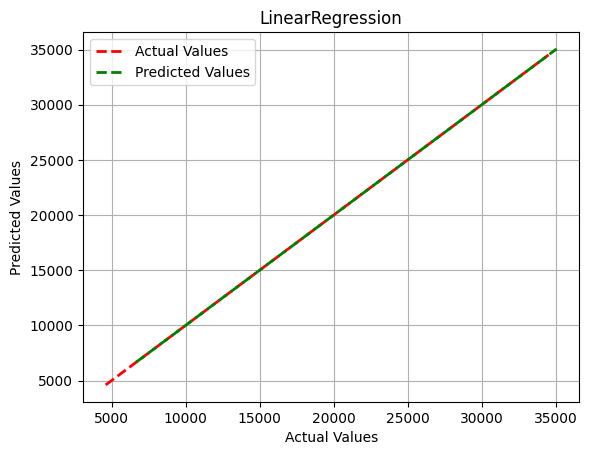

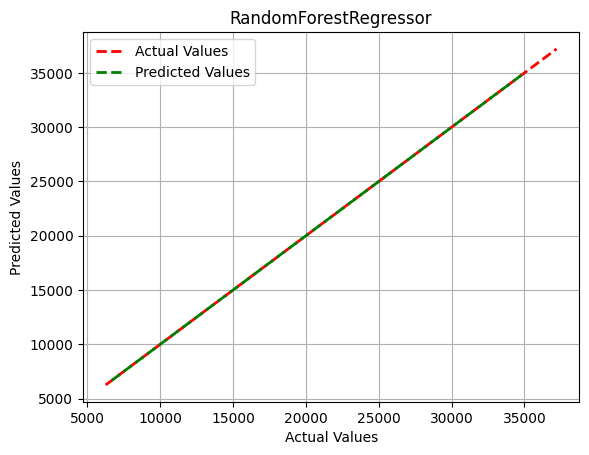

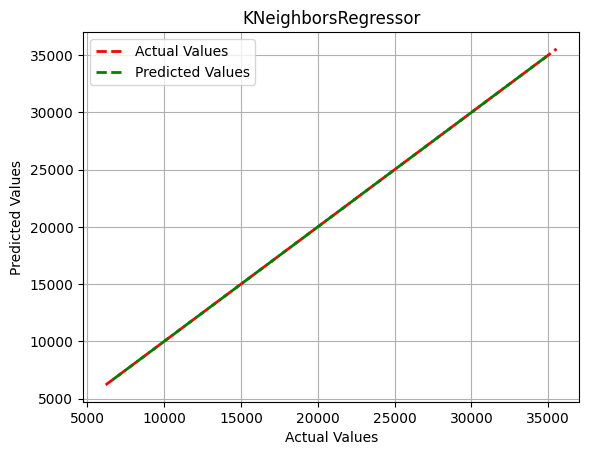

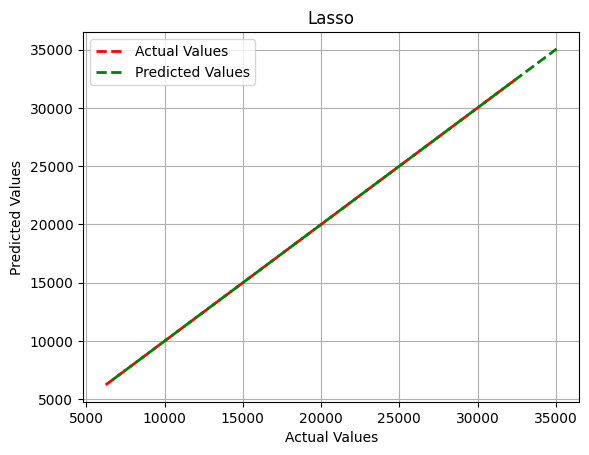

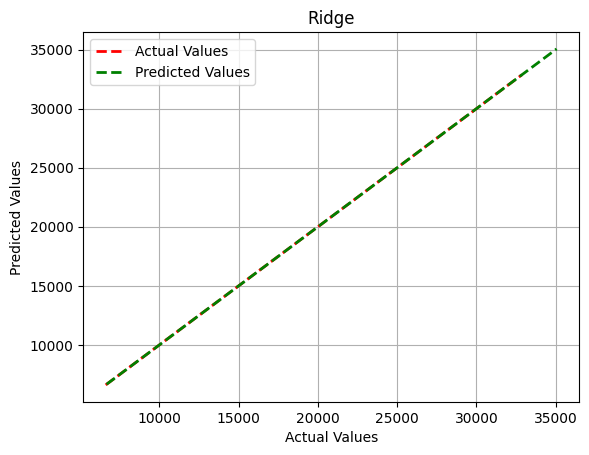

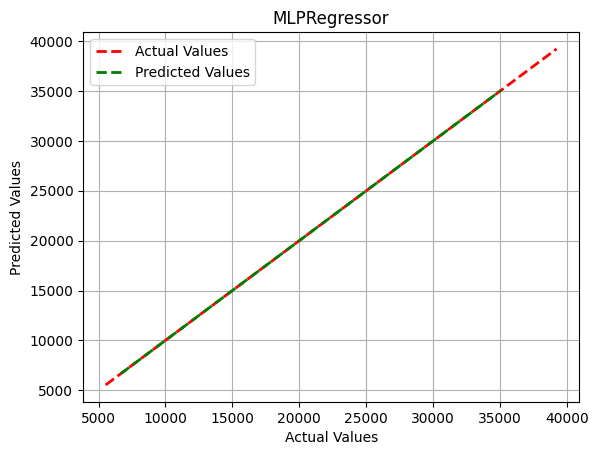

In [49]:
traininggraph(y_test,lg_pred,'LinearRegression')
traininggraph(y_test,rf_pred,'RandomForestRegressor')
traininggraph(y_test,knn_pred,'KNeighborsRegressor')
traininggraph(y_test,lasso_pred,'Lasso')
traininggraph(y_test,ridge_pred,'Ridge')
traininggraph(y_test,regr_pred,'MLPRegressor')

In [ ]:
pickle.dump(lg, open('/content/drive/MyDrive/growintern_internship/lg.pkl', 'wb'))
pickle.dump(knn, open('/content/drive/MyDrive/growintern_internship/knn.pkl', 'wb'))
pickle.dump(rf, open('/content/drive/MyDrive/growintern_internship/rf.pkl', 'wb'))
pickle.dump(scaler, open('/content/drive/MyDrive/growintern_internship/scaler.pkl', 'wb'))
